# PROJECT_16: AUTOMOBILE_INSURANCE_FRAUD_DETECTION

In [1]:
# Import the required Libraries
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Lets read the csv file
df = pd.read_csv('Automobile_insurance_fraud.csv')

In [3]:
#Lets see first five rows of data
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [4]:
#Lets see the shape of the data
df.shape

(1000, 40)

In [5]:
#Lets see the datatypes
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [6]:
#Lets get more info on data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
months_as_customer             1000 non-null int64
age                            1000 non-null int64
policy_number                  1000 non-null int64
policy_bind_date               1000 non-null object
policy_state                   1000 non-null object
policy_csl                     1000 non-null object
policy_deductable              1000 non-null int64
policy_annual_premium          1000 non-null float64
umbrella_limit                 1000 non-null int64
insured_zip                    1000 non-null int64
insured_sex                    1000 non-null object
insured_education_level        1000 non-null object
insured_occupation             1000 non-null object
insured_hobbies                1000 non-null object
insured_relationship           1000 non-null object
capital-gains                  1000 non-null int64
capital-loss                   1000 non-null int64
incident_date    

In [7]:
#There several categorical data
#Lets check the unique values in each feature
df.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

In [8]:
# We can policy number is uniqe for each customer, lets drop it
#Incident location is also unique for each customer, lets drop it
# Policy bind  data info is also dropped as almost same info is getting reflected in month as a customer
#Zip column is also dropped as it has so many unique levels to be encoded
#Lets drop _c39 as its a empy column

df.drop(['incident_location','insured_zip','policy_number','policy_bind_date','_c39'],axis=1,inplace=True)

In [9]:
#Lets check the shape again
df.shape

(1000, 35)

In [10]:
#Lets see the missing values
df.isnull().sum()
#It seems there are no missing values, we will explore more soon

months_as_customer             0
age                            0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_claim_amount             0
injury_claim                   0
property_claim                 0
vehicle_cl

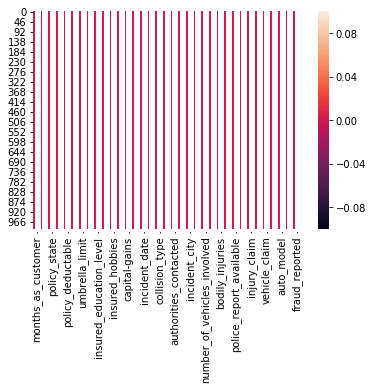

In [11]:
#Lets confirm about the missing values
sns.heatmap(df.isnull(), annot=True)

In [12]:
#Lets explore the numeric features in the data
df._get_numeric_data().head()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
0,328,48,1000,1406.91,0,53300,0,5,1,1,2,71610,6510,13020,52080,2004
1,228,42,2000,1197.22,5000000,0,0,8,1,0,0,5070,780,780,3510,2007
2,134,29,2000,1413.14,5000000,35100,0,7,3,2,3,34650,7700,3850,23100,2007
3,256,41,2000,1415.74,6000000,48900,-62400,5,1,1,2,63400,6340,6340,50720,2014
4,228,44,1000,1583.91,6000000,66000,-46000,20,1,0,1,6500,1300,650,4550,2009


In [13]:
#Lets get the shape of numeric data
df._get_numeric_data().shape

(1000, 16)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000BB11CD6978>,
      dtype=object)

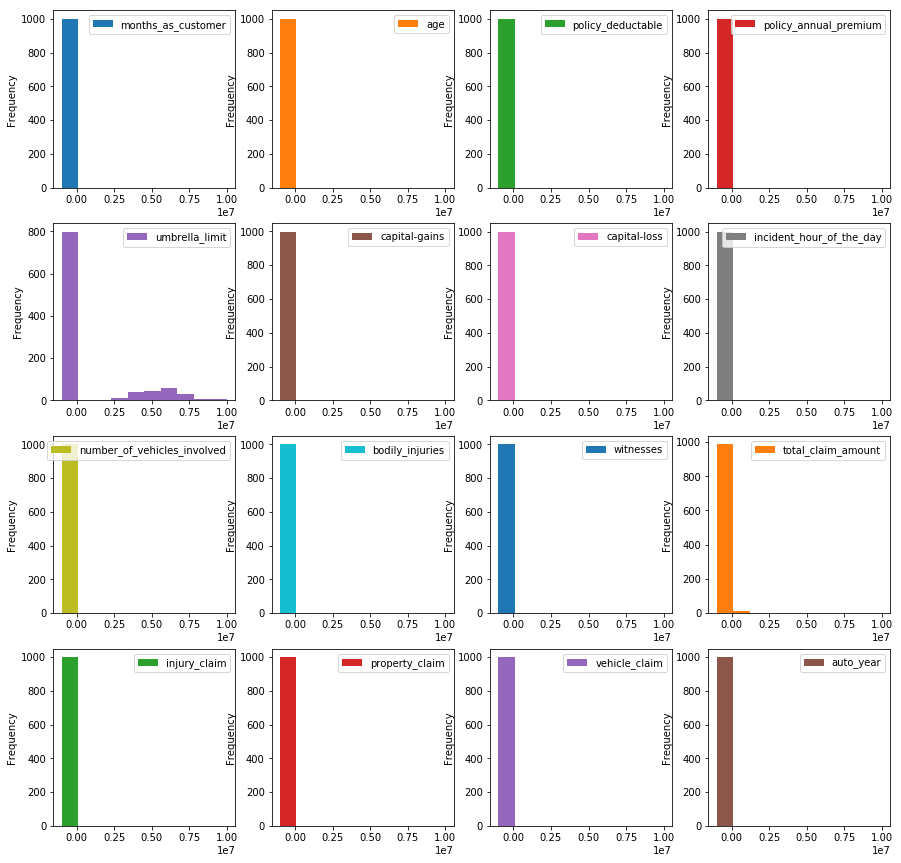

In [14]:
#Lets see the distribution of numeric data
df._get_numeric_data().plot(kind='hist', subplots=True, layout=(4,4),sharex=False,sharey=False,figsize=(15,15))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000BB0E097828>,
      dtype=object)

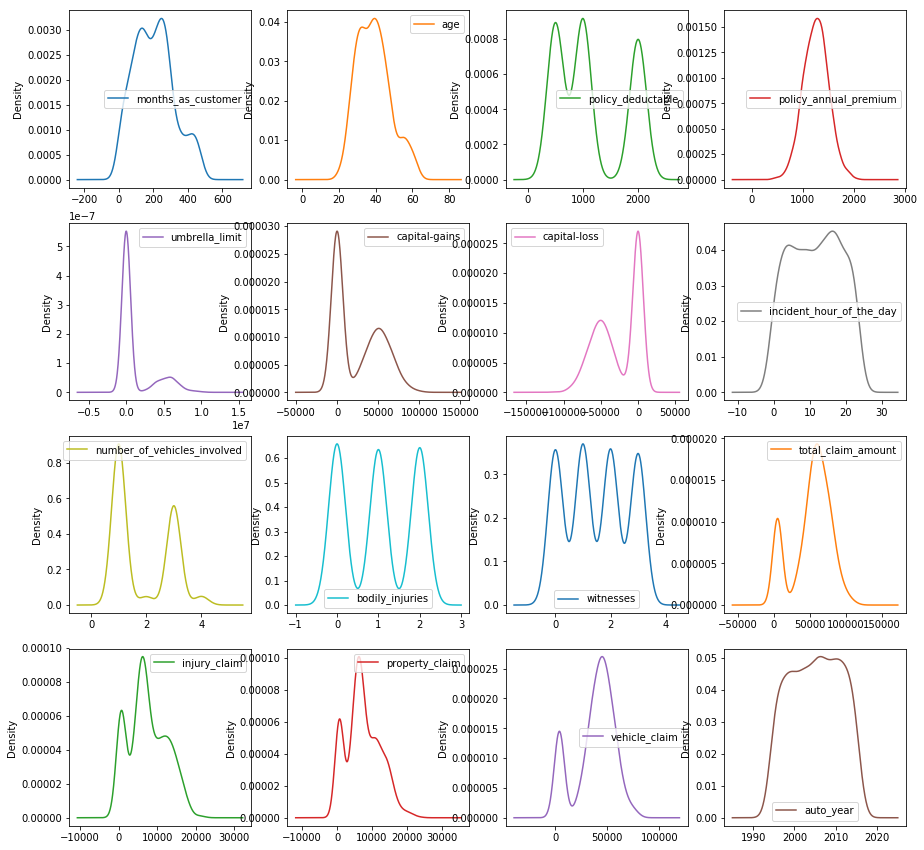

In [15]:
#Lets see the density plot of numeric data
df._get_numeric_data().plot(kind='density', subplots=True, layout=(4,4),sharex=False,sharey=False,figsize=(15,15))

months_as_customer                 AxesSubplot(0.125,0.71587;0.168478x0.16413)
age                             AxesSubplot(0.327174,0.71587;0.168478x0.16413)
policy_deductable               AxesSubplot(0.529348,0.71587;0.168478x0.16413)
policy_annual_premium           AxesSubplot(0.731522,0.71587;0.168478x0.16413)
umbrella_limit                    AxesSubplot(0.125,0.518913;0.168478x0.16413)
capital-gains                  AxesSubplot(0.327174,0.518913;0.168478x0.16413)
capital-loss                   AxesSubplot(0.529348,0.518913;0.168478x0.16413)
incident_hour_of_the_day       AxesSubplot(0.731522,0.518913;0.168478x0.16413)
number_of_vehicles_involved       AxesSubplot(0.125,0.321957;0.168478x0.16413)
bodily_injuries                AxesSubplot(0.327174,0.321957;0.168478x0.16413)
witnesses                      AxesSubplot(0.529348,0.321957;0.168478x0.16413)
total_claim_amount             AxesSubplot(0.731522,0.321957;0.168478x0.16413)
injury_claim                         AxesSubplot(0.1

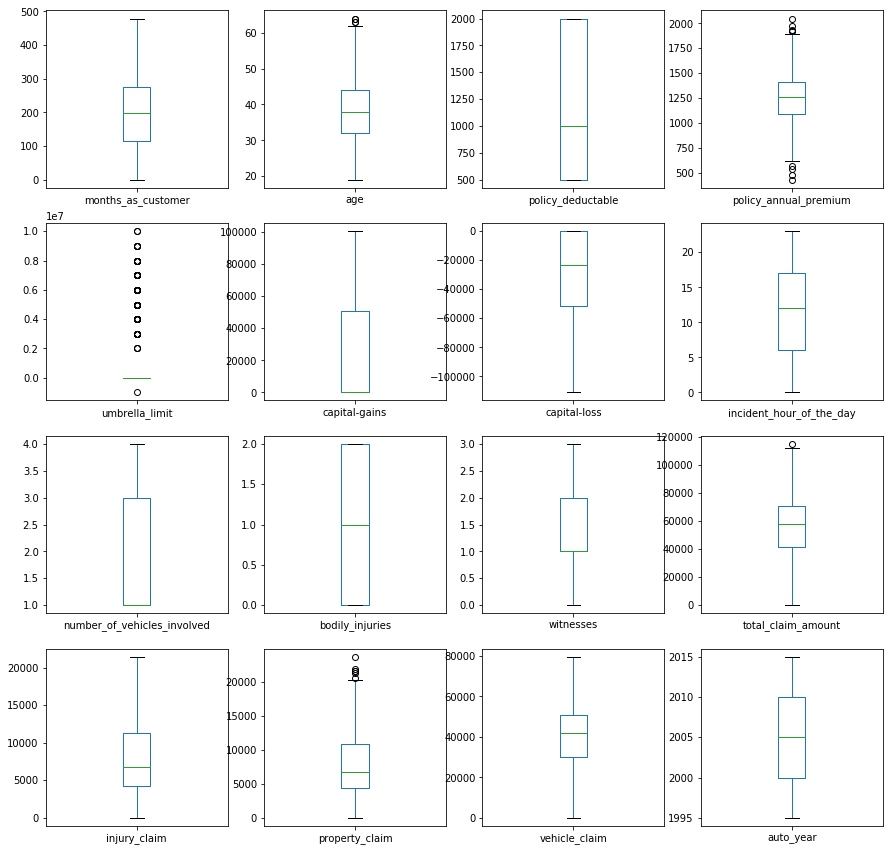

In [16]:
#Lets see the box plot of numeric features

df._get_numeric_data().plot(kind='box', subplots=True, layout=(4,4),sharex=False,sharey=False,figsize=(15,15))
# we can see the presence of outliers in few variables, which will handle later

In [17]:
#Lets see the target column
df['fraud_reported'].value_counts()
# we can see that dataset is imbalanced

N    753
Y    247
Name: fraud_reported, dtype: int64

In [18]:
#Lets explore the policy state
df['policy_state'].value_counts()
#There are just 3 states, we will use dummy encoding for them

OH    352
IL    338
IN    310
Name: policy_state, dtype: int64

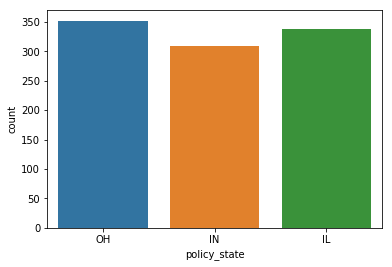

In [19]:
#Lets see the count of elements from each policy state
sns.countplot(x=df['policy_state'])


Text(0, 0.5, 'fraud_reported')

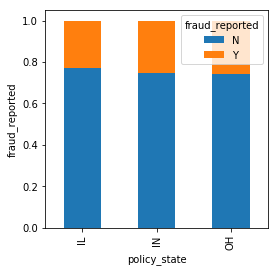

In [20]:
#Lets the see the relation of policy state with fraud reported
state=pd.crosstab(df['policy_state'],df['fraud_reported'])
state.div(state.sum(1).astype(float),axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.ylabel('fraud_reported')
#we can see that IL has minimum cases of fraud reported but not very significant difference from others

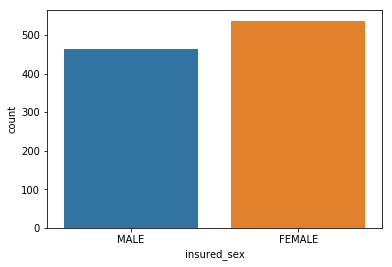

In [21]:
#Lets see the count of males and females in insured sex
sns.countplot(x=df['insured_sex'])

Text(0, 0.5, 'fraud_reported')

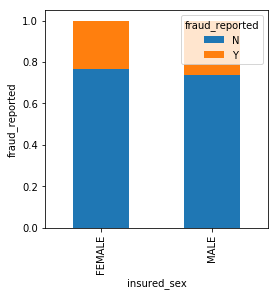

In [22]:
#Lets the see the relation of insured sex with fraud reported
ins_s=pd.crosstab(df['insured_sex'],df['fraud_reported'])
ins_s.div(ins_s.sum(1).astype(float),axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.ylabel('fraud_reported')
#we can see that males are expected to do more frauds than females

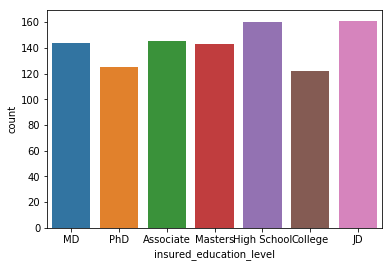

In [23]:
#Lets see the count of different education levels 
sns.countplot(x=df['insured_education_level'])

Text(0, 0.5, 'fraud_reported')

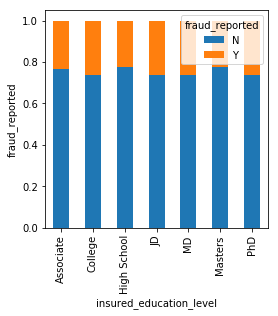

In [24]:
#Lets the see the relation of insured education level with fraud reported
ins_l=pd.crosstab(df['insured_education_level'],df['fraud_reported'])
ins_l.div(ins_l.sum(1).astype(float),axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.ylabel('fraud_reported')
#we can see that education has impact on the target as different education level is leading to different number of fraud cases reported

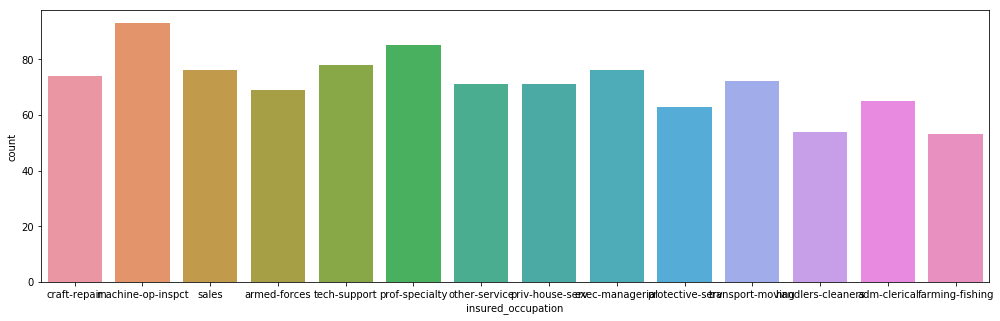

In [25]:
#Lets see the count of different insured_occupations
plt.figure(figsize=(17,5))
sns.countplot(x=df['insured_occupation'])

Text(0, 0.5, 'fraud_reported')

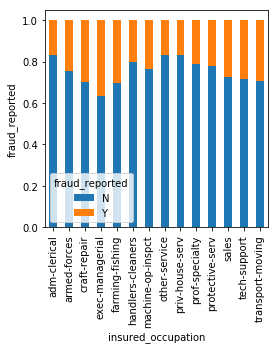

In [26]:
#Lets the see the relation of insured occupation level with fraud reported
ins_o=pd.crosstab(df['insured_occupation'],df['fraud_reported'])
ins_o.div(ins_o.sum(1).astype(float),axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.ylabel('fraud_reported')
#we can see that occupation has impact on the target as different occupation  is leading to difference in  fraud cases reported
# Exec-Managerial occupation seems to cause max frauds
#It is also a very important feature as difference in percentage  of frauds is significant

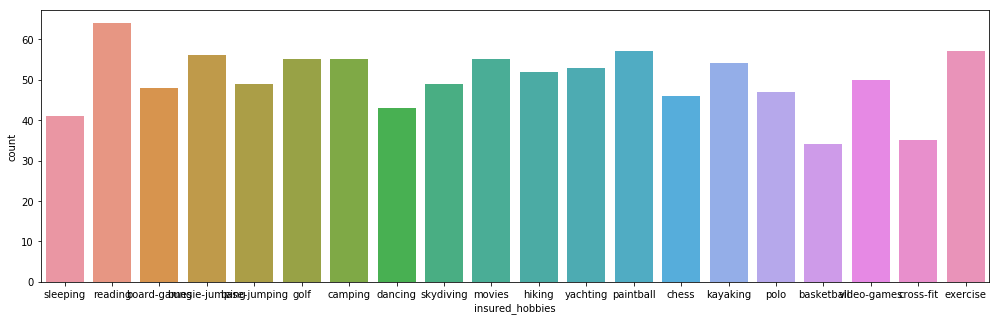

In [27]:
#Lets see the count of different insured_hobbies
plt.figure(figsize=(17,5))
sns.countplot(x=df['insured_hobbies'])

Text(0, 0.5, 'fraud_reported')

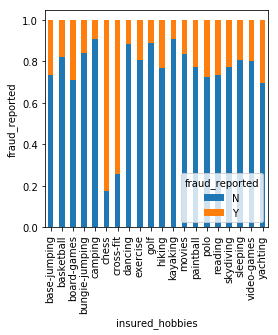

In [28]:
#Lets the see the relation of insured hobbies level with fraud reported
ins_h=pd.crosstab(df['insured_hobbies'],df['fraud_reported'])
ins_h.div(ins_h.sum(1).astype(float),axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.ylabel('fraud_reported')
#we can see that hobbies has impact on the target as different hobbies is leading to difference in fraud cases reported
# Persons who have hobby of chess seems to cause max frauds followed by people who have hobby of crossfit
# it is very important feature as difference in fraud cases reported is quite significant

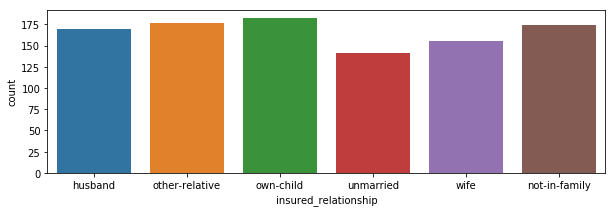

In [29]:
#Lets see the count of different relationships 
plt.figure(figsize=(10,3))
sns.countplot(x=df['insured_relationship'])

Text(0, 0.5, 'fraud_reported')

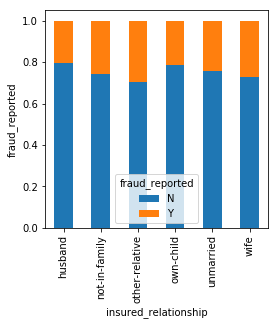

In [30]:
#Lets the see the relation of insured_relationship level with fraud reported
ins_r=pd.crosstab(df['insured_relationship'],df['fraud_reported'])
ins_r.div(ins_r.sum(1).astype(float),axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.ylabel('fraud_reported')
#we can see that relation has impact on the target 

Text(0, 0.5, 'fraud_reported')

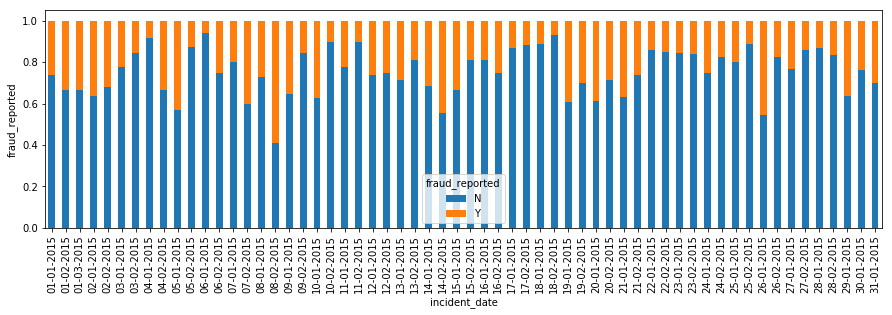

In [31]:
#Lets the see the relation of incident_date level with fraud reported
ins_d=pd.crosstab(df['incident_date'],df['fraud_reported'])
ins_d.div(ins_d.sum(1).astype(float),axis=0).plot(kind="bar", stacked=True, figsize=(15,4))
plt.ylabel('fraud_reported')
#we can see most of the cases are from jan and feb 
#data is of one year only
# so we will drop this column

In [32]:
# Lets drop the date column
df.drop('incident_date',axis=1,inplace=True)

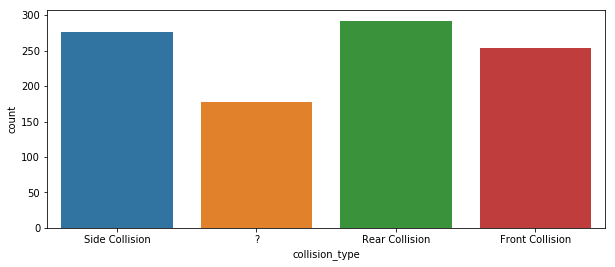

In [33]:
#Lets see the count of different collision types
plt.figure(figsize=(10,4))
sns.countplot(x=df['collision_type'])

Text(0, 0.5, 'fraud_reported')

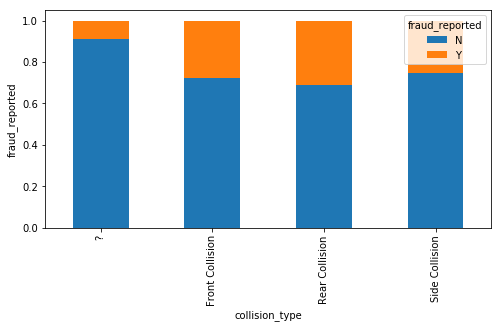

In [34]:
#Lets the see the relation of collision_type level with fraud reported
coll=pd.crosstab(df['collision_type'],df['fraud_reported'])
coll.div(coll.sum(1).astype(float),axis=0).plot(kind="bar", stacked=True, figsize=(8,4))
plt.ylabel('fraud_reported')
# there are few cases whose collision type is unknown
#Rear collision have highest percentage of frauds

In [35]:
#Lets replace the ? in collision type column with 'unknown'
df['collision_type'].replace('?','unknown',inplace=True)

In [36]:
#Lets confirm it
df['collision_type'].value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
unknown            178
Name: collision_type, dtype: int64

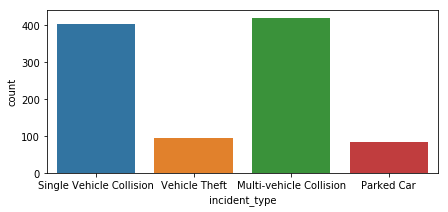

In [37]:
#Lets see the count of different incident types
plt.figure(figsize=(7,3))
sns.countplot(x=df['incident_type'])

Text(0, 0.5, 'fraud_reported')

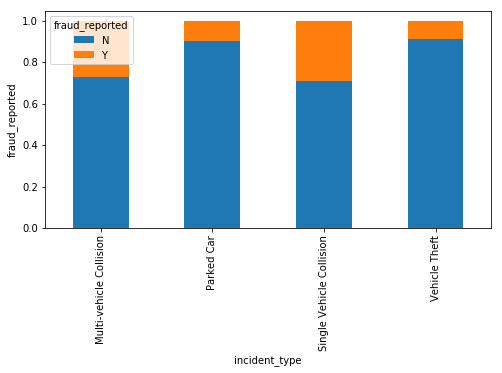

In [38]:
#Lets the see the relation of incident_type level with fraud reported
inc=pd.crosstab(df['incident_type'],df['fraud_reported'])
inc.div(inc.sum(1).astype(float),axis=0).plot(kind="bar", stacked=True, figsize=(8,4))
plt.ylabel('fraud_reported')
# least % of frauds reported  in case of vehicle theft
# Maximum % of  frauds  reported in case of single vehicle collision

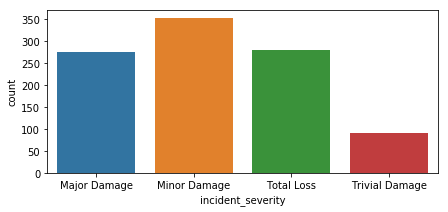

In [39]:
#Lets see the count of different incident_severity level
plt.figure(figsize=(7,3))
sns.countplot(x=df['incident_severity'])

Text(0, 0.5, 'fraud_reported')

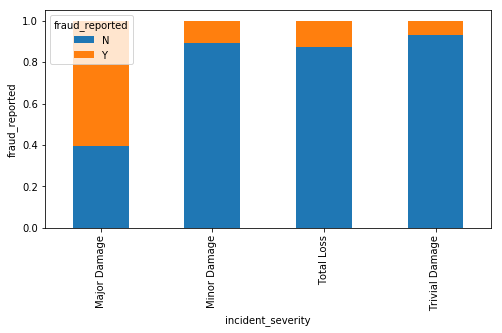

In [40]:
#Lets the see the relation of incident_severity level with fraud reported
ins=pd.crosstab(df['incident_severity'],df['fraud_reported'])
ins.div(ins.sum(1).astype(float),axis=0).plot(kind="bar", stacked=True, figsize=(8,4))
plt.ylabel('fraud_reported')
# Least % of frauds reported in case of trival damage
#Maximum % of frauds reported in case of Major damage

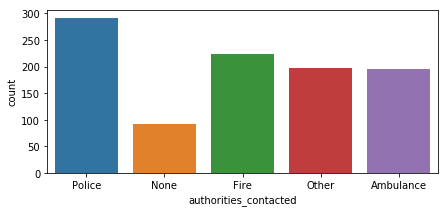

In [41]:
#Lets see the count of different authorities contacted
plt.figure(figsize=(7,3))
sns.countplot(x=df['authorities_contacted'])

Text(0, 0.5, 'fraud_reported')

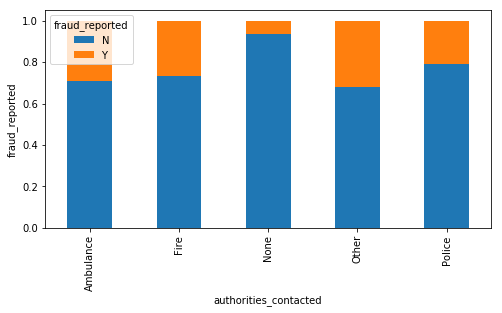

In [42]:
#Lets the see the relation of authorities_contacted level with fraud reported
ac=pd.crosstab(df['authorities_contacted'],df['fraud_reported'])
ac.div(ac.sum(1).astype(float),axis=0).plot(kind="bar", stacked=True, figsize=(8,4))
plt.ylabel('fraud_reported')
# Least frauds are reported in case when no authorities are contacted
#Differnt authorities show different fraud rate

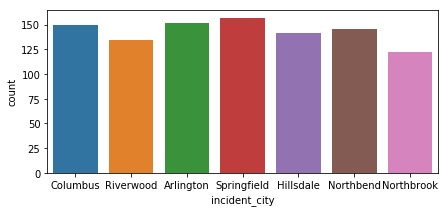

In [43]:
#lETS SEE THE COUNT OF DIFFERENT INCIDENT CITIES
plt.figure(figsize=(7,3))
sns.countplot(x=df['incident_city'])

Text(0, 0.5, 'fraud_reported')

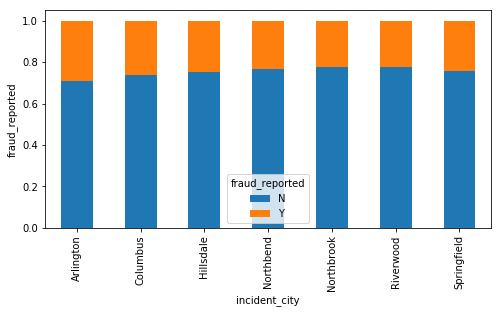

In [44]:
#Lets the see the relation of 'incident_city' level with fraud reported
city=pd.crosstab(df['incident_city'],df['fraud_reported'])
city.div(city.sum(1).astype(float),axis=0).plot(kind="bar", stacked=True, figsize=(8,4))
plt.ylabel('fraud_reported')
#there does not seems much differnce in fraud rate according to city

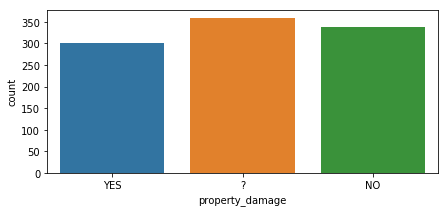

In [45]:
#Lets see the count plot of propertly damage
plt.figure(figsize=(7,3))
sns.countplot(x=df['property_damage'])

Text(0, 0.5, 'fraud_reported')

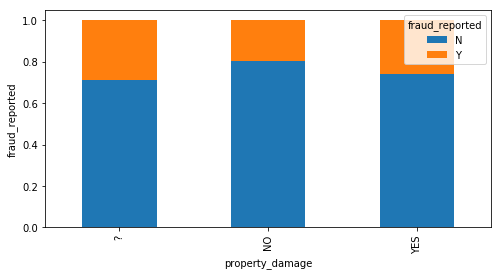

In [46]:
#Lets the see the relation of 'property_damage' level with fraud reported
prop=pd.crosstab(df['property_damage'],df['fraud_reported'])
prop.div(prop.sum(1).astype(float),axis=0).plot(kind="bar", stacked=True, figsize=(8,4))
plt.ylabel('fraud_reported')
#there is difference in fraud report rate as per property damage
# there are few entries marked as ?

In [47]:
#Lets replace the ? in property damage column with 'unknown'
df['property_damage'].replace('?','unknown',inplace=True)

In [48]:
#Lets check the property damage
df['property_damage'].value_counts()

unknown    360
NO         338
YES        302
Name: property_damage, dtype: int64

Text(0, 0.5, 'fraud_reported')

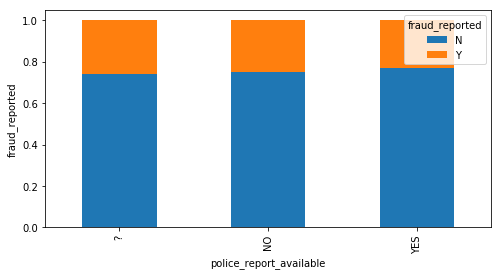

In [49]:
#Lets the see the relation of 'police_report_available' level with fraud reported
pol=pd.crosstab(df['police_report_available'],df['fraud_reported'])
pol.div(pol.sum(1).astype(float),axis=0).plot(kind="bar", stacked=True, figsize=(8,4))
plt.ylabel('fraud_reported')
#there is not much difference in fraud report rates as per availability of police reports
# there are few entries marked as ?

In [50]:
#ets replace the ? in police report column with 'unknown'
df['police_report_available'].replace('?','unknown',inplace=True)

In [51]:
#Lets check the police report column
df['police_report_available'].value_counts()

unknown    343
NO         343
YES        314
Name: police_report_available, dtype: int64

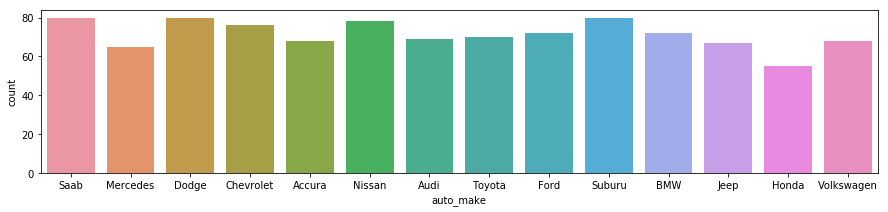

In [52]:
#Lets see the count plot of auto make
plt.figure(figsize=(15,3))
sns.countplot(x=df['auto_make'])

Text(0, 0.5, 'fraud_reported')

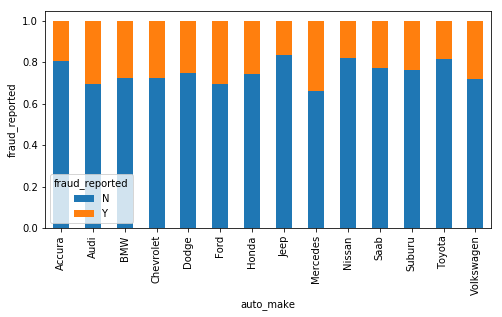

In [53]:
#Lets the see the relation of 'auto_make' level with fraud reported
auto=pd.crosstab(df['auto_make'],df['fraud_reported'])
auto.div(auto.sum(1).astype(float),axis=0).plot(kind="bar", stacked=True, figsize=(8,4))
plt.ylabel('fraud_reported')
#There is significant difference in fraud report rate as auto make
#Max fraud is being reported in case of Mercedes closely followed by audi
#Minimum in case of JEEP

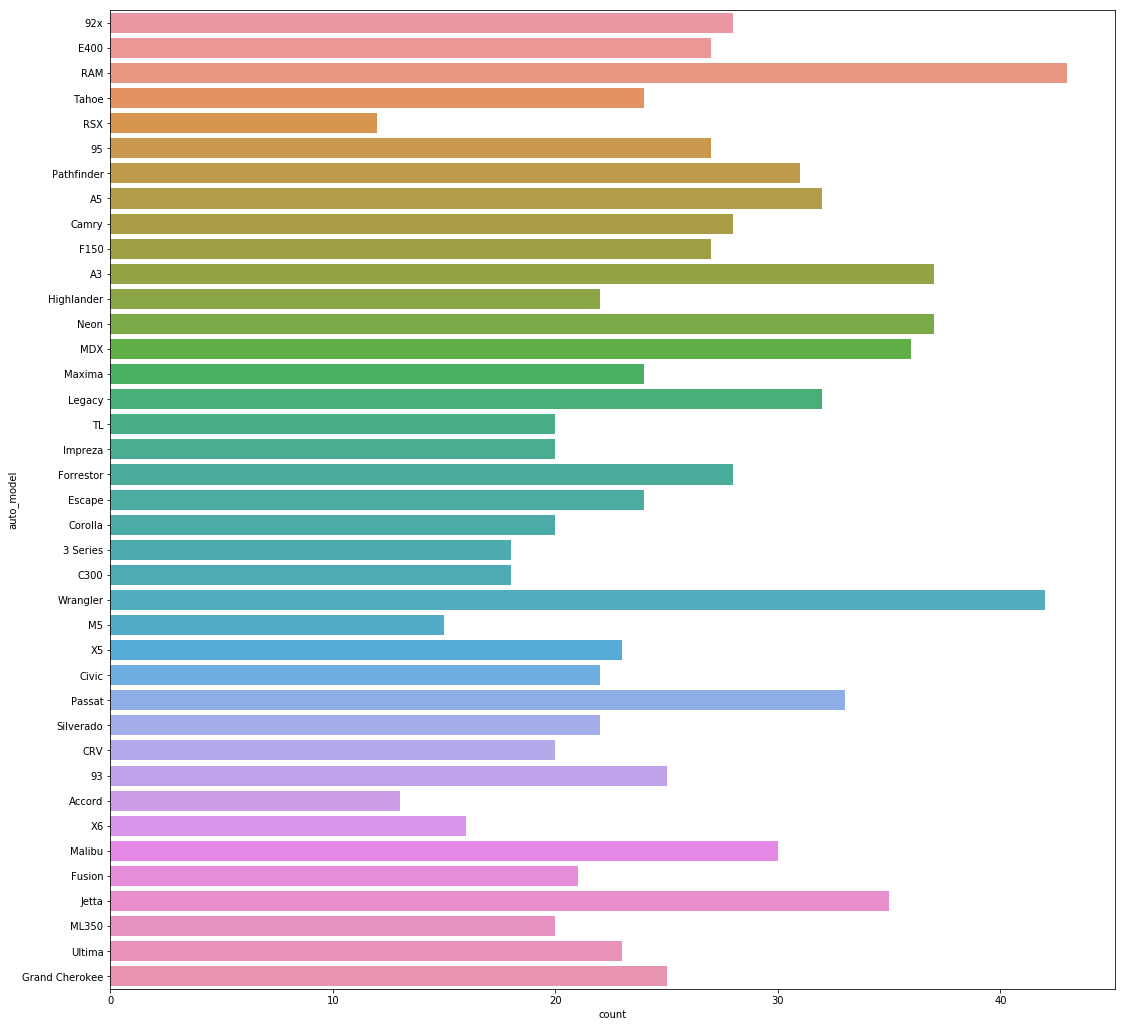

In [54]:
#Lets see the count plot of auto model
plt.figure(figsize=(18,18))
sns.countplot(y=df['auto_model'])

Text(0, 0.5, 'fraud_reported')

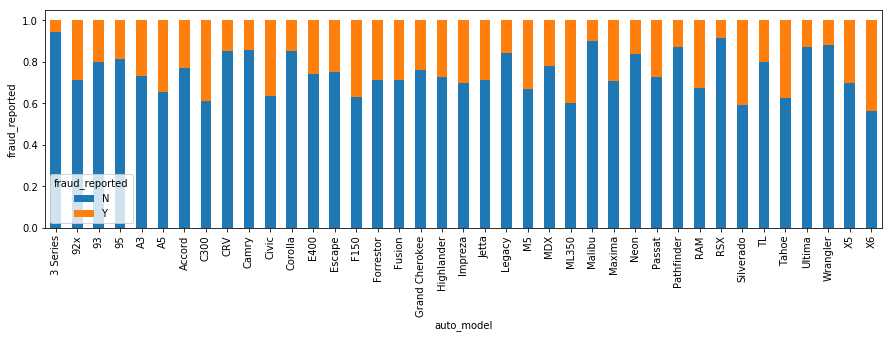

In [55]:
#Lets the see the relation of 'auto_model' level with fraud reported
autom=pd.crosstab(df['auto_model'],df['fraud_reported'])
autom.div(autom.sum(1).astype(float),axis=0).plot(kind="bar", stacked=True, figsize=(15,4))
plt.ylabel('fraud_reported')
#There is significant difference in fraud report rate as per auto model


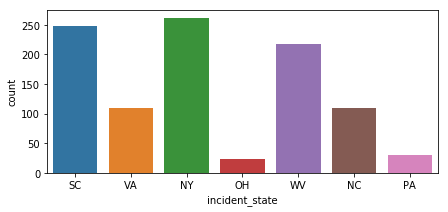

In [56]:
#Lets see the count plot of incident state
plt.figure(figsize=(7,3))
sns.countplot(x=df['incident_state'])

Text(0, 0.5, 'fraud_reported')

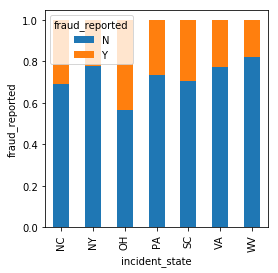

In [57]:
#Lets the see the relation of incident_state with fraud reported
incs=pd.crosstab(df['incident_state'],df['fraud_reported'])
incs.div(incs.sum(1).astype(float),axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.ylabel('fraud_reported')
#we can see that different incident states have different fraud rates
# Max fraud rates are reported when incidence happend in OH and minimum in case of WV


Text(0, 0.5, 'fraud_reported')

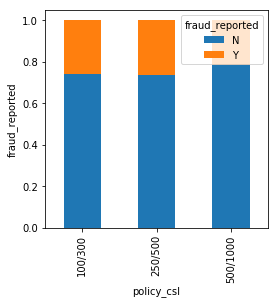

In [58]:
#Lets the see the relation of policy csl with fraud reported
policy_csl=pd.crosstab(df['policy_csl'],df['fraud_reported'])
policy_csl.div(policy_csl.sum(1).astype(float),axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.ylabel('fraud_reported')


In [59]:
#Lets seperate csl per person  and csl per accident
df['csl_per_person'] = df.policy_csl.str.split('/', expand=True)[0]
df['csl_per_accident'] = df.policy_csl.str.split('/', expand=True)[1]

In [60]:
#Lets drop policy csl column
df.drop('policy_csl',axis=1,inplace=True)

In [61]:
# Lets create bins for incident hour according to the time period of the day.
bins = [-1, 3, 6, 9, 12, 17, 20, 24]  # Factorize according to the time period of the day.
names = ["past_midnight", "early_morning", "morning", 'fore-noon', 'afternoon', 'evening', 'night']
df['incident_period_of_day'] = pd.cut(df.incident_hour_of_the_day, bins, labels=names).astype(object)


In [62]:
#Lets drop the incident hour of day
df.drop('incident_hour_of_the_day',axis=1,inplace=True)

In [63]:
#Lets see the numeric data
df._get_numeric_data().head()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
0,328,48,1000,1406.91,0,53300,0,1,1,2,71610,6510,13020,52080,2004
1,228,42,2000,1197.22,5000000,0,0,1,0,0,5070,780,780,3510,2007
2,134,29,2000,1413.14,5000000,35100,0,3,2,3,34650,7700,3850,23100,2007
3,256,41,2000,1415.74,6000000,48900,-62400,1,1,2,63400,6340,6340,50720,2014
4,228,44,1000,1583.91,6000000,66000,-46000,1,0,1,6500,1300,650,4550,2009


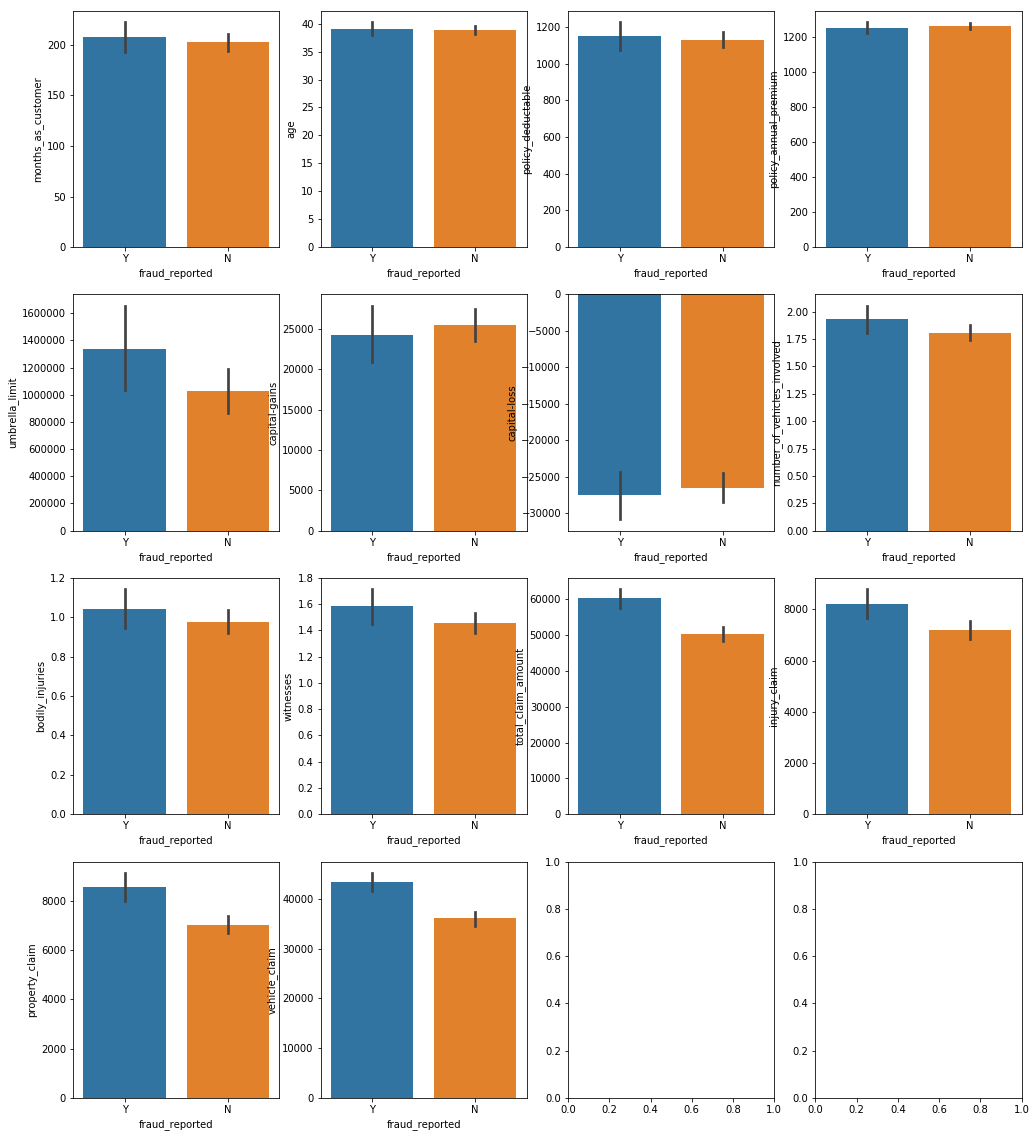

In [64]:
#Lets visualize relation of categorical paramters with respect to 'claim amount'
f,axes= plt.subplots(4,4, figsize=(17,20))
sns.barplot(x='fraud_reported', y ='months_as_customer', data=df,ax=axes[0,0])
sns.barplot(x='fraud_reported', y ='age', data=df, ax=axes[0,1])
sns.barplot(x='fraud_reported', y ='policy_deductable', data=df, ax=axes[0,2])
sns.barplot(x='fraud_reported', y ='policy_annual_premium', data=df, ax=axes[0,3])
sns.barplot(x='fraud_reported', y ='umbrella_limit', data=df, ax=axes[1,0])
sns.barplot(x='fraud_reported', y ='capital-gains', data=df, ax=axes[1,1])
sns.barplot(x='fraud_reported', y ='capital-loss', data=df, ax=axes[1,2])
sns.barplot(x='fraud_reported', y ='number_of_vehicles_involved', data=df, ax=axes[1,3])
sns.barplot(x='fraud_reported', y ='bodily_injuries', data=df, ax=axes[2,0])
sns.barplot(x='fraud_reported', y ='witnesses', data=df, ax=axes[2,1])
sns.barplot(x='fraud_reported', y ='total_claim_amount', data=df, ax=axes[2,2])
sns.barplot(x='fraud_reported', y ='injury_claim', data=df, ax=axes[2,3])
sns.barplot(x='fraud_reported', y ='property_claim', data=df, ax=axes[3,0])
sns.barplot(x='fraud_reported', y ='vehicle_claim', data=df, ax=axes[3,1])

In [65]:
#Lets check the skeness in numeric data
df._get_numeric_data().skew()

months_as_customer             0.362177
age                            0.478988
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
capital-gains                  0.478850
capital-loss                  -0.391472
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
total_claim_amount            -0.594582
injury_claim                   0.264811
property_claim                 0.378169
vehicle_claim                 -0.621098
auto_year                     -0.048289
dtype: float64

In [66]:
#Lets reduce the positive skewness
for col in df._get_numeric_data().columns:                                      
    if df._get_numeric_data().skew().loc[col]>0.55:
        df._get_numeric_data()[col]=np.log1p(df._get_numeric_data()[col])

In [67]:
#Lets check the skewness again
df._get_numeric_data().skew()

months_as_customer             0.362177
age                            0.478988
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
capital-gains                  0.478850
capital-loss                  -0.391472
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
total_claim_amount            -0.594582
injury_claim                   0.264811
property_claim                 0.378169
vehicle_claim                 -0.621098
auto_year                     -0.048289
dtype: float64

In [68]:
#Lets reduce the positive skewness
for col in df._get_numeric_data().columns:                                      
    if df._get_numeric_data().skew().loc[col]<-0.55:
        df._get_numeric_data()[col]=np.power(df._get_numeric_data()[col],2)

In [69]:
#Lets check the skewness again
df._get_numeric_data().skew()

months_as_customer             0.362177
age                            0.478988
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
capital-gains                  0.478850
capital-loss                  -0.391472
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
total_claim_amount             0.533008
injury_claim                   0.264811
property_claim                 0.378169
vehicle_claim                  0.488948
auto_year                     -0.048289
dtype: float64

In [70]:
# Lets remove the outliers if any
from scipy.stats import zscore
colm=df._get_numeric_data()
z_score =abs(zscore(colm))
dfx = df.loc[(z_score<3).all(axis=1)]
print('The shape of original dataframe was =', df.shape)
print('The shape of dataframe after removing outliers is =', dfx.shape)
# There were few outliers which have been removed

The shape of original dataframe was = (1000, 35)
The shape of dataframe after removing outliers is = (969, 35)


In [71]:
#Lets seperate target and features
x=dfx.drop('fraud_reported',axis=1)
y=dfx[['fraud_reported']]

In [72]:
#Lets see the first five rows of x
x.head()

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,...,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,csl_per_person,csl_per_accident,incident_period_of_day
0,328,48,OH,1000,1406.91,0,MALE,MD,craft-repair,sleeping,...,5127992100,6510,13020,2712326400,Saab,92x,2004,250,500,early_morning
1,228,42,IN,2000,1197.22,5000000,MALE,MD,machine-op-inspct,reading,...,25704900,780,780,12320100,Mercedes,E400,2007,250,500,morning
2,134,29,OH,2000,1413.14,5000000,FEMALE,PhD,sales,board-games,...,1200622500,7700,3850,533610000,Dodge,RAM,2007,100,300,morning
3,256,41,IL,2000,1415.74,6000000,FEMALE,PhD,armed-forces,board-games,...,4019560000,6340,6340,2572518400,Chevrolet,Tahoe,2014,250,500,early_morning
4,228,44,IL,1000,1583.91,6000000,MALE,Associate,sales,board-games,...,42250000,1300,650,20702500,Accura,RSX,2009,500,1000,evening


In [73]:
#Lets see the first five rows of y
y.head()

,fraud_reported
0,Y
1,Y
2,N
3,Y
4,N


In [74]:
#Lets encode the categorical variables
x1=pd.get_dummies(x,drop_first=True)

In [75]:
#Lets check the first five rows of x1
x1.head()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,number_of_vehicles_involved,bodily_injuries,witnesses,...,csl_per_person_250,csl_per_person_500,csl_per_accident_300,csl_per_accident_500,incident_period_of_day_early_morning,incident_period_of_day_evening,incident_period_of_day_fore-noon,incident_period_of_day_morning,incident_period_of_day_night,incident_period_of_day_past_midnight
0,328,48,1000,1406.91,0,53300,0,1,1,2,...,1,0,0,1,1,0,0,0,0,0
1,228,42,2000,1197.22,5000000,0,0,1,0,0,...,1,0,0,1,0,0,0,1,0,0
2,134,29,2000,1413.14,5000000,35100,0,3,2,3,...,0,0,1,0,0,0,0,1,0,0
3,256,41,2000,1415.74,6000000,48900,-62400,1,1,2,...,1,0,0,1,1,0,0,0,0,0
4,228,44,1000,1583.91,6000000,66000,-46000,1,0,1,...,0,1,0,0,0,1,0,0,0,0


In [77]:
#ALL THE DATA IS IN NUMERIC FORM

In [78]:
#As it is a classification problem lets import require metrics from  libraries
from sklearn.metrics import accuracy_score, classification_report,roc_auc_score,roc_curve,confusion_matrix

In [79]:
#Lets see which of the algorithims performs well on the given data
# A good way to check their performance is cross validation
#Lets import the algorithims/models to be evaluated  AND OTHER REQUIRED LIBRARIES
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

In [80]:
# Lets import standard scaler as distance based algorithim require data to be in same scale
from sklearn.preprocessing import StandardScaler
# Lets create a list of models to be evaluated ALONG with pipeline
pipelines = []
pipelines.append(('LR', Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression())])))
pipelines.append(('LDA', Pipeline([('Scaler', StandardScaler()),('LDA',LinearDiscriminantAnalysis())])))
pipelines.append(('KNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('DT', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier(random_state=5))])))
pipelines.append(('NB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
pipelines.append(('SVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC())])))

In [81]:
#As dataset is imbalanced lets use stratified k fold
from sklearn.model_selection import StratifiedKFold
skfold = StratifiedKFold(n_splits=10, random_state=1,shuffle=True) 

In [82]:
#Let us check which model will perform well on the given data on the basis of mean crossval score and its std dev
results = []
names = []
for name, model in pipelines: 
     
    cv_results = cross_val_score(model, x1, y, cv=skfold, scoring='accuracy') 
    results.append(cv_results.mean()) 
    names.append(name) 
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.817416 (0.032917)
LDA: 0.839078 (0.020550)
KNN: 0.704804 (0.029299)
DT: 0.795605 (0.045246)
NB: 0.641092 (0.071618)
SVM: 0.787411 (0.025774)


In [83]:
#Lets create a comparison chart
Comparisonc = pd.DataFrame({'ModelName':names,'cross_val_accuracy': results})
Comparisonc.sort_values(by='cross_val_accuracy', ascending=False)

,ModelName,cross_val_accuracy
1,LDA,0.839078
0,LR,0.817416
3,DT,0.795605
5,SVM,0.787411
2,KNN,0.704804
4,NB,0.641092


In [84]:
#lETS CREATE PIPLELINE FOR ENSEMBLE TECHNIQUE
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
pipelines1 = []
pipelines1.append(('RF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestClassifier(random_state=5))])))
pipelines1.append(('ADC', Pipeline([('Scaler', StandardScaler()),('ADC', AdaBoostClassifier(random_state=5))])))
pipelines1.append(('GBC', Pipeline([('Scaler', StandardScaler()),('GBC', GradientBoostingClassifier(random_state=5))])))                                    


In [85]:
#lets  see if any of the three chosen ensemble technique  with default paramters can give improved accuracy

results1 = []
names1 = []

for name, model in pipelines1: 
    cv_results1 = cross_val_score(model, x1, y, cv=skfold, scoring='accuracy') 
    results1.append(cv_results1.mean()) 
    names1.append(name) 
    msg1 = "%s: %f (%f)" % (name, cv_results1.mean(), cv_results1.std())
    print(msg1)   

RF: 0.769916 (0.020005)
ADC: 0.799772 (0.019781)
GBC: 0.810018 (0.035777)


In [86]:
#Lets create a comparison chart
Comparisonn = pd.DataFrame({'ModelName':names1,'cross_val_accuracy': results1})
Comparisonn.sort_values(by='cross_val_accuracy', ascending=False)

,ModelName,cross_val_accuracy
2,GBC,0.810018
1,ADC,0.799772
0,RF,0.769916


In [87]:
#Lets create a  final comparison chart
finalcomparison = pd.concat([Comparisonc,Comparisonn])
finalcomparison.sort_values(by='cross_val_accuracy',ascending =False)

,ModelName,cross_val_accuracy
1,LDA,0.839078
0,LR,0.817416
2,GBC,0.810018
1,ADC,0.799772
3,DT,0.795605
5,SVM,0.787411
0,RF,0.769916
2,KNN,0.704804
4,NB,0.641092


In [88]:
# Lets import the library to split train and test data
from sklearn.model_selection import train_test_split

In [89]:
#Lets find out the best random state for selected LDA

max_accuracy=0
lda= LinearDiscriminantAnalysis()
for i in range(1,100):
    X_train, X_test, y_train, y_test = train_test_split(x1, y,test_size=0.2, random_state=i,stratify=y)
    ss = StandardScaler()
    X_train= ss.fit_transform(X_train)
    X_test= ss.transform(X_test)
    lda.fit(X_train,y_train)
    ypreds=lda.predict(X_test)
    accuracy=accuracy_score(y_test, ypreds)
    print('At random state ', i, 'the value of accuracy is ', accuracy)
    if accuracy>max_accuracy:
        max_accuracy=accuracy
        finalstate=i
print()
print()
print('max accuracy is', max_accuracy,'at random state' , finalstate)

At random state  1 the value of accuracy is  0.8814432989690721
At random state  2 the value of accuracy is  0.8247422680412371
At random state  3 the value of accuracy is  0.7989690721649485
At random state  4 the value of accuracy is  0.8402061855670103
At random state  5 the value of accuracy is  0.9020618556701031
At random state  6 the value of accuracy is  0.8505154639175257
At random state  7 the value of accuracy is  0.8608247422680413
At random state  8 the value of accuracy is  0.845360824742268
At random state  9 the value of accuracy is  0.8195876288659794
At random state  10 the value of accuracy is  0.8556701030927835
At random state  11 the value of accuracy is  0.8762886597938144
At random state  12 the value of accuracy is  0.8505154639175257
At random state  13 the value of accuracy is  0.8556701030927835
At random state  14 the value of accuracy is  0.8402061855670103
At random state  15 the value of accuracy is  0.8298969072164949
At random state  16 the value of ac

In [90]:
#Lets build the model using the best random state
X_train, X_test, y_train,y_test = train_test_split(x1,y,test_size =0.2, random_state = 5,stratify=y)
sc = StandardScaler()
X_train= sc.fit_transform(X_train)
X_test= sc.transform(X_test)
LDA= LinearDiscriminantAnalysis()
LDA.fit(X_train,y_train)
ypred=LDA.predict(X_test)
accuracy= accuracy_score(y_test,ypred)
print('accuracy is', accuracy)

accuracy is 0.9020618556701031


# We saw that test accuracy is 0.902 and kfold cross val accuracy is 0.839

In [91]:
# Lets save the predicted result to a csv file
dfpr = pd.DataFrame(ypred,columns=['Predicted_values'])
dfpr.to_csv('LDA_FRAUD_prediction.csv')

In [92]:
#Lets print the confusion matrix
print('confusion matrix = ',confusion_matrix(y_test,ypred))

confusion matrix =  [[139   8]
 [ 11  36]]


In [93]:
#Lets print the classification report
print('classification report = ',classification_report(y_test,ypred))

classification report =                precision    recall  f1-score   support

           N       0.93      0.95      0.94       147
           Y       0.82      0.77      0.79        47

   micro avg       0.90      0.90      0.90       194
   macro avg       0.87      0.86      0.86       194
weighted avg       0.90      0.90      0.90       194



In [94]:
# As expected, we can see model is good in predicting N in comparison to Y
# As the data set was imbalanced and had more N values than Y values
# Due to large number of N values model learned well to predict N values

In [95]:
# Lets dump our final model into pkl file
from sklearn.externals import joblib
joblib.dump(LDA,'LDA_FRAUD.pkl')

['LDA_FRAUD.pkl']